## Observations and Insights 

Based on the analyzed data we can say that:
- Capomulin and Ramicane were the most effective in reducing tumors, the least effective was Ketapril.
- There was a 49.6% female mice and a 50.4% male mice, sex didn't seem to be a factor in results.
- There is a positive correlation between mouse weight and average tumor volume for the Capomulin regimen (0.84).



In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mice_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df.loc[mice_df.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique().tolist()

['g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_df[mice_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mice_df[mice_df['Mouse ID'] != 'g989']
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mice_gby = clean_mice.groupby('Drug Regimen')
summary_statistics = mice_gby['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics.columns = ['Tumor Vol Mean', 'Tumor Vol Median', 'Tumor Vol Var', 'Tumor Vol Std', 'Tumor Vol SEM']
summary_statistics

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Var,Tumor Vol Std,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


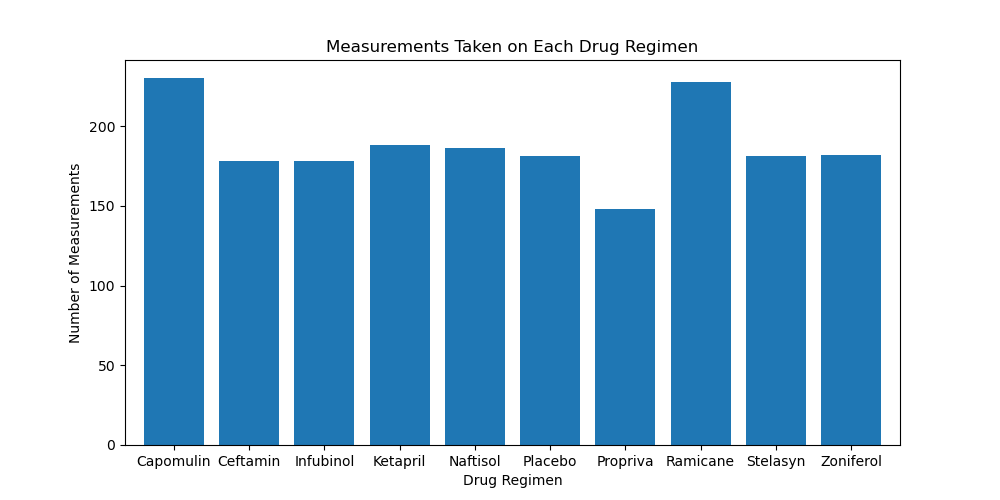

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

chart_data = clean_mice.groupby(["Drug Regimen"]).count()["Mouse ID"]

plt.figure()
chart_data.plot(kind='bar', figsize=(10,5), rot=0, width=0.8)
plt.title("Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

<IPython.core.display.Javascript object>


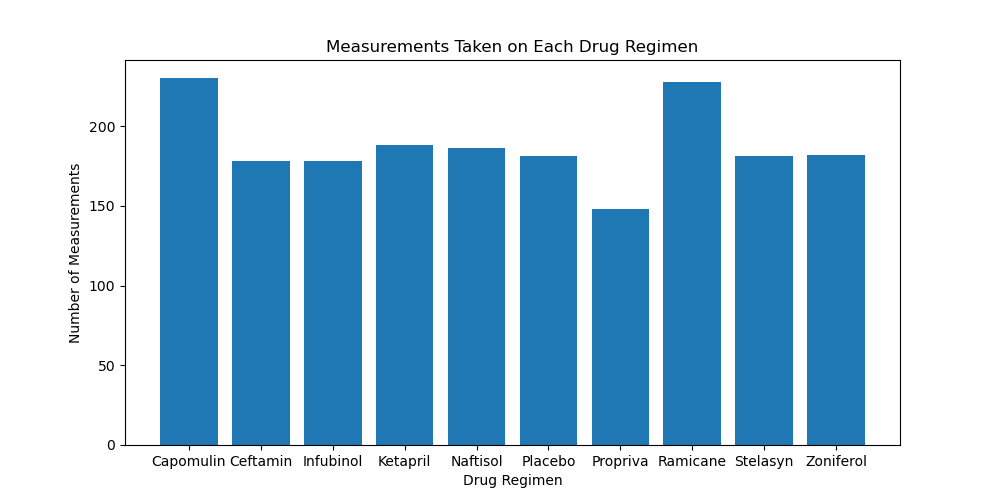

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_count = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(chart_data))

plt.figure(figsize=(10,5))
plt.bar(x_axis, mice_count, width=0.8)
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.title("Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()


<IPython.core.display.Javascript object>


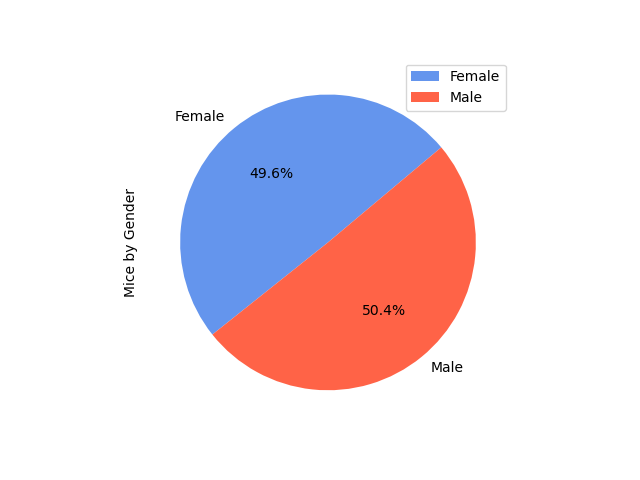

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

unique_mice = clean_mice.drop_duplicates(subset=['Mouse ID'], keep='first')
mice_gby = unique_mice.groupby(["Sex"]).count()
mice_gender = pd.DataFrame(mice_gby['Mouse ID'])
mice_gender.columns = ['Mice by Gender']

colors = ['cornflowerblue', 'tomato']
mice_gender.plot(kind="pie", y='Mice by Gender', colors=colors, startangle=40, autopct="%1.1f%%")
plt.show()

<IPython.core.display.Javascript object>


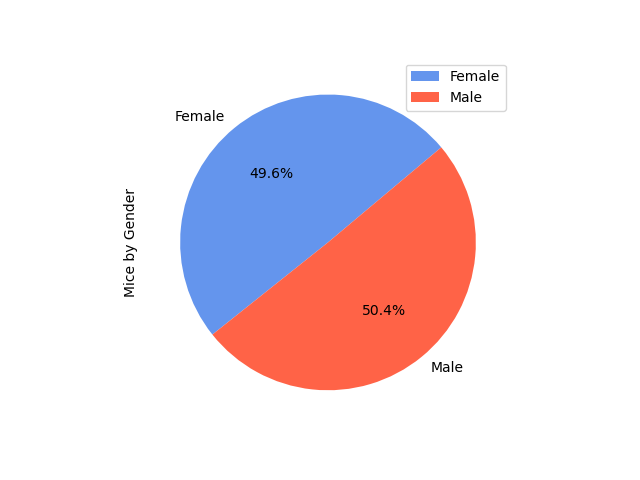

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


genders = ['Female', 'Male']
sizes = [49.6,50.4]
colors = ['cornflowerblue', 'tomato']

plt.figure()
plt.pie(sizes, labels=genders, colors=colors, autopct="%1.1f%%", startangle=40)
plt.ylabel('Mice by Gender')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_time = clean_mice.drop_duplicates(subset=['Mouse ID'], keep='last')

Capomulin_df = last_time.loc[clean_mice["Drug Regimen"] == "Capomulin",:]
Ramicane_df = last_time.loc[clean_mice["Drug Regimen"] == "Ramicane",:]
Infubinol_df = last_time.loc[clean_mice["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = last_time.loc[clean_mice["Drug Regimen"] == "Ceftamin",:]


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

the_list = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]

def listToString(val):  # to turn list into string
    str1 = ""
    for i in val:
        str1 += i
    return str1  

for regimen in the_list:
    quartiles = regimen['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    reg = regimen['Drug Regimen'].unique()
    print(f"The interquartile range of {listToString(reg)} is: {iqr}")
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    print('----------------------------------------------------------------------')
    
    

    

The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 and above 51.83201549 could be outliers.
----------------------------------------------------------------------
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 and above 54.30681135 could be outliers.
----------------------------------------------------------------------
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
----------------------------------------------------------------------
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 and above 87.66645829999999 could be outliers.
----------------------------------------------------------------------


<IPython.core.display.Javascript object>


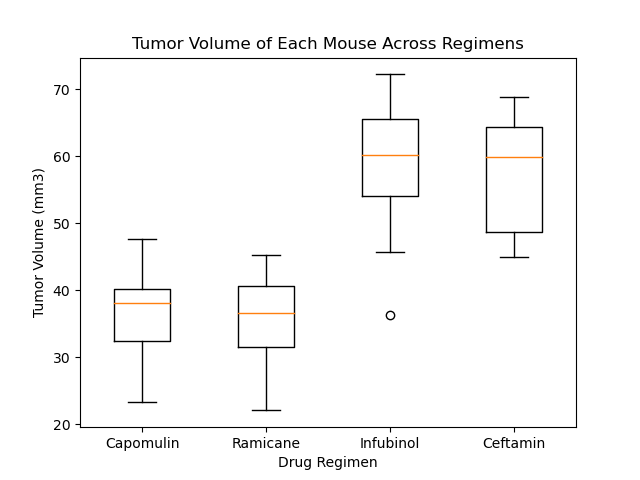

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

r1 = Capomulin_df['Tumor Volume (mm3)']
r2 = Ramicane_df['Tumor Volume (mm3)']
r3 = Infubinol_df['Tumor Volume (mm3)']
r4 = Ceftamin_df['Tumor Volume (mm3)']

Regimens = (r1, r2, r3, r4)

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse Across Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Regimens)
plt.xticks([1, 2, 3, 4], ["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


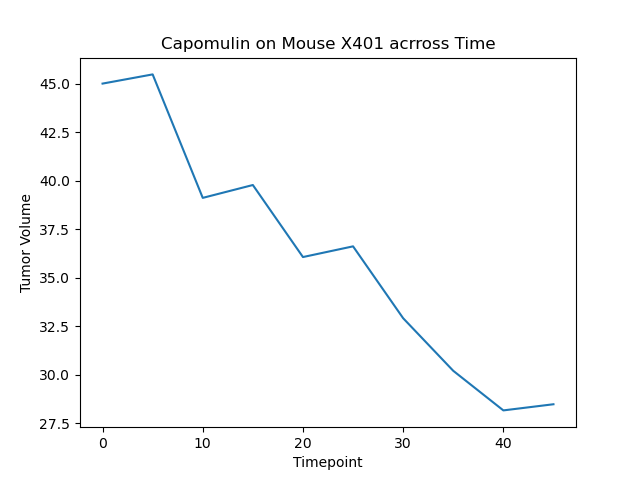

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.figure()

x401_df = clean_mice.loc[clean_mice['Mouse ID'] == 'x401']

timepoint = x401_df['Timepoint']
tumor_vol = x401_df['Tumor Volume (mm3)']

plt.title("Capomulin on Mouse X401 acrross Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.plot(timepoint, tumor_vol)
plt.show()

<IPython.core.display.Javascript object>


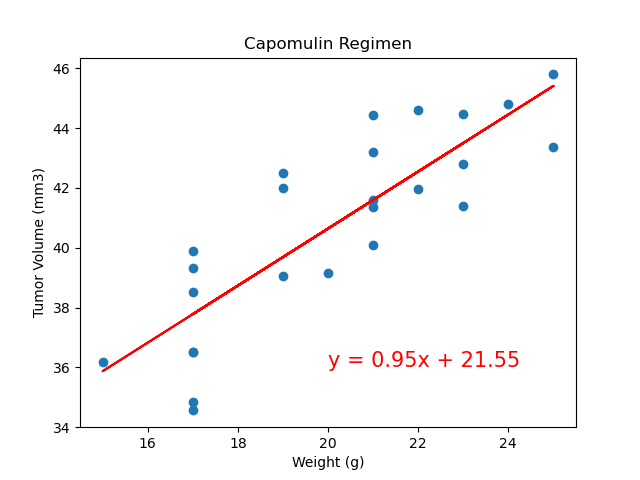

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_data = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin",:]
capo_gby = capo_data.groupby('Mouse ID')

atv = capo_gby['Tumor Volume (mm3)'].mean()  #avt = average tumor volume
weight = capo_gby['Weight (g)'].mean()

plt.figure()

plt.title("Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(weight, atv)
plt.show()




## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight, atv)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, atv)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")



The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84
The r-squared is: 0.7088568047708717
